In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# Data file paths
county_2015_path = "../Output/2015_cleaned_all_county.csv"
state_2015_path = "../Output/2015_cleaned_state.csv"
county_2017_path = "../Output/2017_cleaned_all_county.csv"
state_2017_path = "../Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [2]:
# Display State 2015
state_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [3]:
# Creating 2015 Citizen Poverty DF 
citpov_15_state = state_2015[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_15_state.head()
state_2015_citpov = citpov_15_state.copy()
# state_2015_citpov.head()

In [4]:
# Generate new DF for 2015 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_15 = (state_2015_citpov["Poverty"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["Poverty(%)"] = pov_tpop_prcnt_state_15
cit_tpop_prcnt_state_15 = (state_2015_citpov["VotingAgeCitizen"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_15
citpov_diff_15 = state_2015_citpov["VotingAgeCitizen(%)"] - state_2015_citpov["Poverty(%)"]
state_2015_citpov["CitPovDiff(%)"] = citpov_diff_15
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4830620,3620994,910480,37973,20780,18.848098,74.959198,56.111100
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576


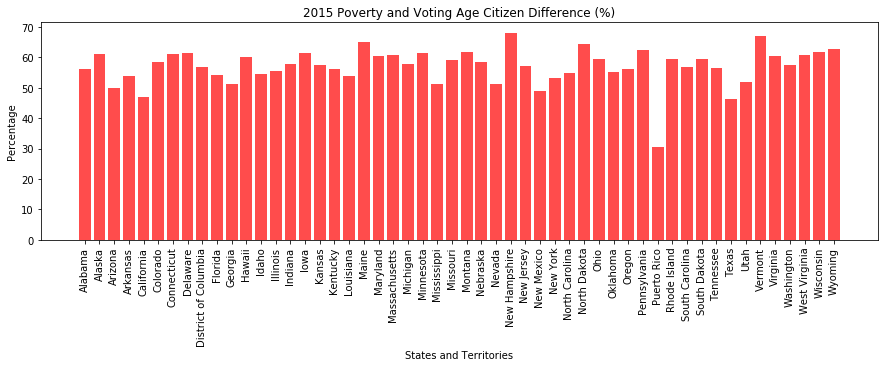

In [5]:
# Bar plot of State 2015 Poverty and Voting Age Citizen differerence (%)
citpovdiff15 = state_2015_citpov["CitPovDiff(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_15, citpovdiff15, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [6]:
# Lowest poverty % 2015
lowest_pov_15 = state_2015_citpov.nsmallest(10, "Poverty(%)")
lowest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
20,Maryland,5930538,4182241,594311,69200,33073,10.021199,70.520432,60.499233
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
6,Connecticut,3593222,2574178,377780,71184,37025,10.513684,71.639826,61.126142
30,New Jersey,8904413,6053893,964839,73014,36084,10.835515,67.987559,57.152044
11,Hawaii,1406299,1001729,157965,64879,31892,11.232675,71.231580,59.998905
23,Minnesota,5419171,3950807,612737,53926,27610,11.306840,72.904269,61.597429
34,North Dakota,721640,546486,82741,55574,31900,11.465689,75.728341,64.262652
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
51,Wyoming,579679,430026,66992,57042,29223,11.556741,74.183471,62.626730


In [7]:
# Highest Voting Age Citizen % 2015
high_vac_15 = state_2015_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1329100,1048274,185317,46141,25792,13.943044,78.870965,64.927921
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
49,West Virginia,1851420,1455848,333578,39411,21710,18.017414,78.634129,60.616716
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
26,Montana,1014699,781250,154229,44497,25020,15.199483,76.993276,61.793793


In [8]:
# Highest poverty % 2015
highest_pov_15 = state_2015_citpov.nlargest(5, "Poverty(%)")
highest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,17920,9617,45.520395,76.086170,30.565774
24,Mississippi,2988081,2210424,675977,34938,18805,22.622446,73.974701,51.352256
31,New Mexico,2084117,1457632,438533,40183,21789,21.041669,69.940027,48.898358
18,Louisiana,4625253,3410634,916437,41411,22064,19.813770,73.739404,53.925634
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430


In [9]:
# Lowest Voting Age Citizen % 2015
low_vac_15 = state_2015_citpov.nsmallest(5, "VotingAgeCitizen(%)")
low_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576
44,Texas,26538614,16864962,4586120,46561,23551,17.280933,63.548767,46.267834
45,Utah,2903379,1868008,358445,54687,22552,12.345787,64.339103,51.993315
28,Nevada,2798636,1863799,432724,53689,26317,15.461961,66.596692,51.134731
30,New Jersey,8904413,6053893,964839,73014,36084,10.835515,67.987559,57.152044


In [10]:
# Compiled top 10 states in 2015 that had the smallest gap between poverty and voting age citizens
smallest_10_diff_15 = state_2015_citpov.nsmallest(5, "CitPovDiff(%)")
smallest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,17920,9617,45.520395,76.086170,30.565774
44,Texas,26538614,16864962,4586120,46561,23551,17.280933,63.548767,46.267834
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576
31,New Mexico,2084117,1457632,438533,40183,21789,21.041669,69.940027,48.898358
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921


In [11]:
# Compiled top 10 states in 2015 that had the largest gap between poverty and voting age citizens
largest_10_diff_15 = state_2015_citpov.nlargest(5, "CitPovDiff(%)")
largest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
19,Maine,1329100,1048274,185317,46141,25792,13.943044,78.870965,64.927921
34,North Dakota,721640,546486,82741,55574,31900,11.465689,75.728341,64.262652
51,Wyoming,579679,430026,66992,57042,29223,11.556741,74.183471,62.626730


['Puerto Rico', 'Texas', 'California', 'New Mexico', 'Arizona']

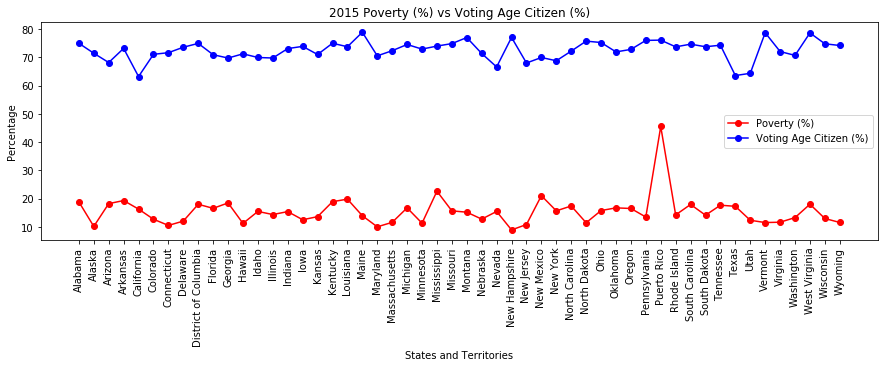

In [12]:
# Line plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, pov_plt_2015, marker="o", color="red", label="Poverty (%)")
plt.plot(state_15, cit_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
# Make list of states. Turn column to list and iterate through list <.tolist()>
state_15_list = smallest_10_diff_15["State"].tolist()
# cpdx_15 = smallest_10_diff_15["State"]
# fig, ax = plt.subplots()
# ax.plot((cpdx_15, cpdx_15),(pov_plt_2015, cit_plt_2015),c='red')

state_15_list

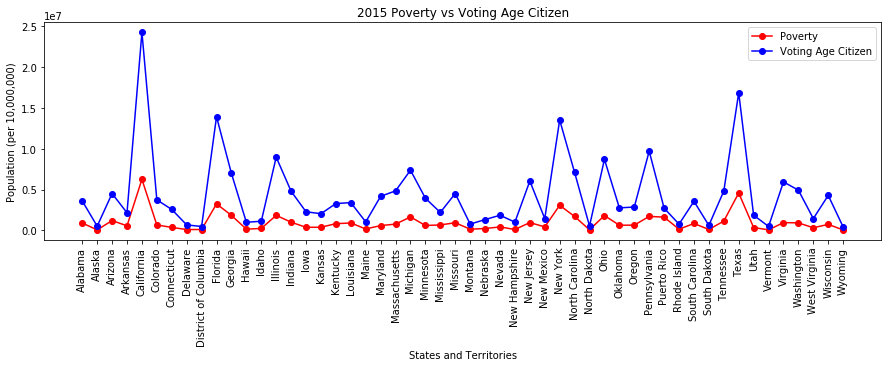

In [13]:
# Line plot of State 2015 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2015 = state_2015_citpov["Poverty"]
citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, povw_plt_2015, marker="o", color="red", label="Poverty")
plt.plot(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (per 10,000,000)")
plt.title("2015 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

In [14]:
# # Multibar plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2015 = state_2015_citpov["Poverty(%)"]
# cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
# state_15 = state_2015_citpov["State"]
# multi_bar_15 = state_2015_citpov[["State", "Poverty(%)", "VotingAgeCitizen(%)"]].plot(kind="bar", figsize=(15,4))
# multi_bar_15.set_xticklabels(state_15, rotation="vertical")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
# plt.show()

In [15]:
# # Scatter plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2015 = state_2015_citpov["Poverty(%)"]
# cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
# state_15 = state_2015_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_15, pov_plt_2015, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Poverty (%)")
# plt.scatter(state_15, cit_plt_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
# tick_locations = [value for value in state_15]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [16]:
# # Scatter plot of 2015 State Poverty (pop) vs Voting Age Citizen (pop)
# povw_plt_2015 = state_2015_citpov["Poverty"]
# citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
# state_15 = state_2015_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_15, povw_plt_2015, marker="o", color="red", label="Poverty (%)")
# plt.scatter(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Number (10,000)")
# plt.title("2015 Poverty vs Voting Age Citizen")
# tick_locations = [value for value in state_15]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [17]:
# Creating 2017 Citizen Poverty DF 
citpov_17_state = state_2017[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_17_state.head()
state_2017_citpov = citpov_17_state.copy()
# state_2017_citpov.head()

In [18]:
# Generate new DF for 2017 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_17 = (state_2017_citpov["Poverty"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["Poverty(%)"] = pov_tpop_prcnt_state_17
cit_tpop_prcnt_state_17 = (state_2017_citpov["VotingAgeCitizen"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_17
citpov_diff_17 = state_2017_citpov["VotingAgeCitizen(%)"] - state_2017_citpov["Poverty(%)"]
state_2017_citpov["CitPovDiff(%)"] = citpov_diff_17
# state_2017_citpov.head()

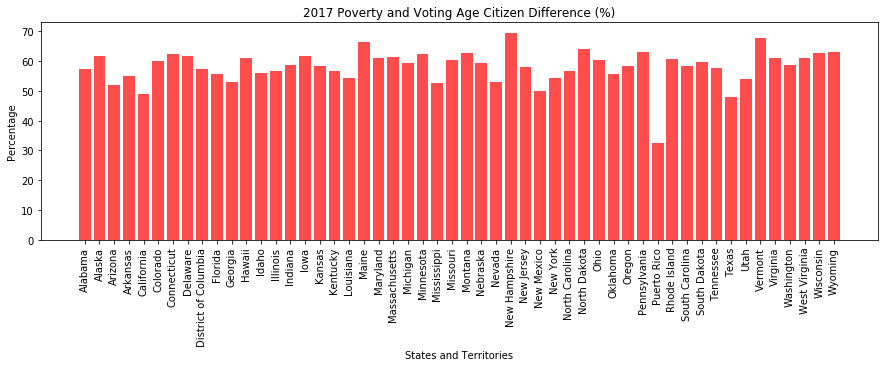

In [19]:
# Bar plot of State 2017 Poverty and Voting Age Citizen differerence (%)
citpovdiff17 = state_2017_citpov["CitPovDiff(%)"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_17, citpovdiff17, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [20]:
# Lowest poverty % 2017
lowest_pov_17 = state_2017_citpov.nsmallest(10, "Poverty(%)")
lowest_pov_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
20,Maryland,5996079,4248702,584091,72541,35127,9.741216,70.858006,61.116790
6,Connecticut,3594478,2599794,362157,74496,39419,10.075371,72.327442,62.252071
1,Alaska,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330
11,Hawaii,1421658,1016468,147143,68663,33930,10.350098,71.498771,61.148673
23,Minnesota,5490726,4010716,576004,57530,29711,10.490489,73.045277,62.554788
30,New Jersey,8960161,6142332,957460,77047,38538,10.685745,68.551581,57.865835
45,Utah,2993941,1942342,329703,59208,24433,11.012341,64.875761,53.863419
34,North Dakota,745475,560530,82241,59795,34084,11.032027,75.190986,64.158959
21,Massachusetts,6789319,4931669,755845,71030,38478,11.132854,72.638640,61.505786


In [21]:
# Highest Voting Age Citizen % 2017
high_vac_17 = state_2017_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1330158,1055130,171773,49680,27791,12.913729,79.323659,66.409930
46,Vermont,624636,493441,70996,55252,30572,11.365980,78.996568,67.630588
49,West Virginia,1836843,1446498,326916,41701,22859,17.797711,78.749136,60.951426
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
39,Puerto Rico,3468963,2690457,1557395,18412,10244,44.895117,77.557962,32.662845


In [22]:
# Highest poverty % 2017
highest_pov_17 = state_2017_citpov.nlargest(5, "Poverty(%)")
# highest_pov_17

In [23]:
# Lowest Voting Age Citizen % 2017
low_vac_17 = state_2017_citpov.nsmallest(5, "VotingAgeCitizen(%)")
# low_vac_17

In [24]:
# Compiled top 10 states in 2017 that had the smallest gap between poverty and voting age citizens
smallest_10_diff_17 = state_2017_citpov.nsmallest(5, "CitPovDiff(%)")
# smallest_10_diff_17

In [25]:
# Compiled top 10 states in 2017 that had the largest gap between poverty and voting age citizens
largest_10_diff_17 = state_2017_citpov.nlargest(5, "CitPovDiff(%)")
# largest_10_diff_17

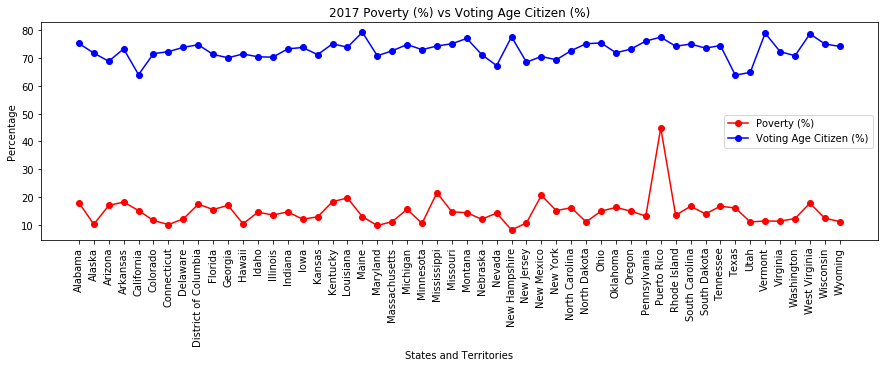

In [26]:
# Line plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2017 = state_2017_citpov["Poverty(%)"]
cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_17, pov_plt_2017, marker="o", color="red", label="Poverty (%)")
plt.plot(state_17, cit_plt_2017, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_17]
plt.xticks(tick_locations, rotation="vertical")
# cpdx_17 = smallest_10_diff_17["State"]
# fig, ax = plt.subplots()
# ax.plot((cpdx_15, cpdx_17),(pov_plt_2017, cit_plt_2017),c='red')

plt.show()

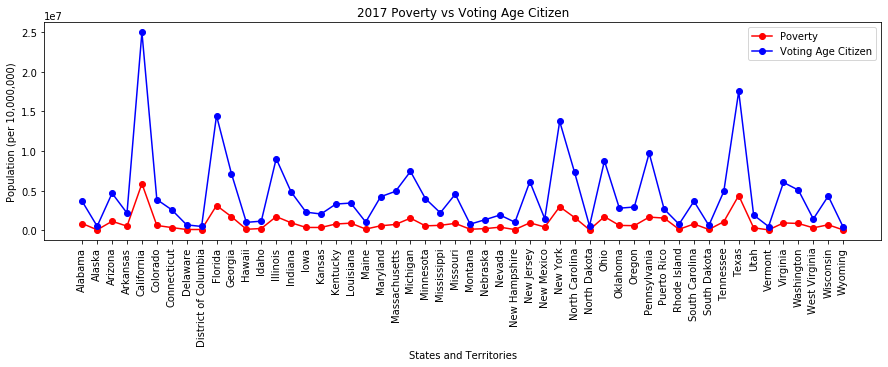

In [27]:
# Line plot of State 2017 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2017 = state_2017_citpov["Poverty"]
citw_plt_2017 = state_2017_citpov["VotingAgeCitizen"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_17, povw_plt_2017, marker="o", color="red", label="Poverty")
plt.plot(state_17, citw_plt_2017, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (per 10,000,000)")
plt.title("2017 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_17]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

In [28]:
# # Multibar plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2017 = state_2017_citpov["Poverty(%)"]
# cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
# state_17 = state_2017_citpov["State"]
# multi_bar_17 = state_2017_citpov[["State", "Poverty(%)", "VotingAgeCitizen(%)"]].plot(kind="bar", figsize=(15,4))
# multi_bar_17.set_xticklabels(state_17, rotation="vertical")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
# plt.show()

In [29]:
# # Scatter plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2017 = state_2017_citpov["Poverty(%)"]
# cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
# state_17 = state_2017_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_17, pov_plt_2017, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Poverty (%)")
# plt.scatter(state_17, cit_plt_2017, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
# tick_locations = [value for value in state_17]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [30]:
# # Scatter plot of 2017 State Poverty (pop) vs Voting Age Citizen (pop)
# povw_plt_2017 = state_2017_citpov["Poverty"]
# citw_plt_2017 = state_2017_citpov["VotingAgeCitizen"]
# state_17 = state_2017_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_17, povw_plt_2017, marker="o", color="red", label="Poverty (%)")
# plt.scatter(state_17, citw_plt_2017, marker="o", color="blue", label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Number (10,000)")
# plt.title("2017 Poverty vs Voting Age Citizen")
# tick_locations = [value for value in state_17]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [31]:
# Generating new DF combining 2015 and 2015
combo_1517 = pd.merge(state_2015_citpov, state_2017_citpov, how="left", on=["State"]).rename(columns=
                                                                                             {"TotalPop_x": "TotalPop2015",
                                                                                             "VotingAgeCitizen_x": "VotingAgeCitizen2015",
                                                                                             "Poverty_x": "Poverty2015",
                                                                                             "Income_x": "Income2015",
                                                                                             "IncomePerCap_x": "IncomePerCap2015",
                                                                                             "Poverty(%)_x": "Poverty(%)2015",
                                                                                             "VotingAgeCitizen(%)_x": "VotingAgeCItizen(%)2015",
                                                                                             "CitPovDiff(%)_x": "CitPovDiff(%)2015",
                                                                                             "TotalPop_y": "TotalPop2017",
                                                                                             "VotingAgeCitizen_y": "VotingAgeCitizen2017",
                                                                                             "Poverty_y": "Poverty2017",
                                                                                             "Income_y": "Income2017",
                                                                                             "IncomePerCap_y": "IncomePerCap2017",
                                                                                             "Poverty(%)_y": "Poverty(%)2017",
                                                                                             "VotingAgeCitizen(%)_y": "VotingAgeCItizen(%)2017",
                                                                                             "CitPovDiff(%)_y": "CitPovDiff(%)2017"})

pov15_pov17_diff = (combo_1517["Poverty2017"] - combo_1517["Poverty2015"]) / combo_1517["Poverty2015"] * 100
combo_1517["Poverty(%)1517Diff"] = pov15_pov17_diff
vac15_vac17_diff = (combo_1517["VotingAgeCitizen2017"] - combo_1517["VotingAgeCitizen2015"]) / combo_1517["VotingAgeCitizen2015"] * 100
combo_1517["VotingAgeCitizen(%)1517Diff"] = vac15_vac17_diff
                                                                                                
combo_1517

,State,TotalPop2015,VotingAgeCitizen2015,Poverty2015,Income2015,IncomePerCap2015,Poverty(%)2015,VotingAgeCItizen(%)2015,CitPovDiff(%)2015,TotalPop2017,VotingAgeCitizen2017,Poverty2017,Income2017,IncomePerCap2017,Poverty(%)2017,VotingAgeCItizen(%)2017,CitPovDiff(%)2017,Poverty(%)1517Diff,VotingAgeCitizen(%)1517Diff
0,Alabama,4830620,3620994,910480,37973,20780,18.848098,74.959198,56.111100,4850771,3651914,871849,40271,22180,17.973411,75.285228,57.311817,-4.242927,0.853909
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330,0.713022,1.261008
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921,6809946,4690177,1154434,45816,22712,16.952176,68.872455,51.920280,-4.619900,3.613821
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430,2977944,2183895,541298,39025,21449,18.176903,73.335664,55.158761,-5.287838,0.915492
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054,-5.862492,2.840816
5,Colorado,5278906,3750953,671100,51263,27747,12.712861,71.055499,58.342638,5436519,3893361,627519,54353,29647,11.542662,71.614962,60.072300,-6.493965,3.796582
6,Connecticut,3593222,2574178,377780,71184,37025,10.513684,71.639826,61.126142,3594478,2599794,362157,74496,39419,10.075371,72.327442,62.252071,-4.135476,0.995114
7,Delaware,926454,681606,111662,58067,28952,12.052622,73.571489,61.518867,943732,697329,114423,61294,31278,12.124523,73.890575,61.766052,2.472641,2.306758
8,District of Columbia,647484,485116,116547,70848,47675,17.999981,74.923241,56.923260,672391,503112,116996,77649,50832,17.399995,74.824321,57.424326,0.385252,3.709628
9,Florida,19645772,13933052,3254111,44046,23501,16.563925,70.921377,54.357452,20278447,14461395,3141410,47144,25265,15.491374,71.314115,55.822741,-3.463342,3.792012


C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


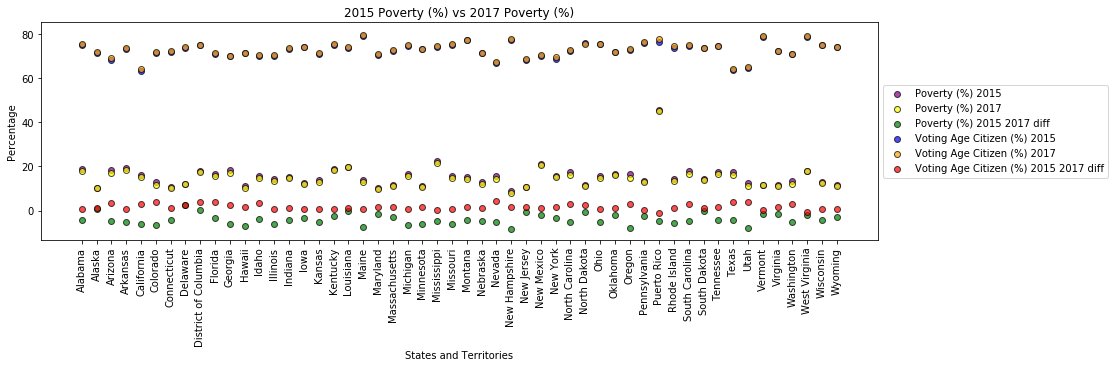

In [32]:
# Scatter plot of comparing Poverty (%) 2015 and Poverty (%) 2017
povp_plt_2015 = combo_1517["Poverty(%)2015"]
povp_plt_2017 = combo_1517["Poverty(%)2017"]
state_plt = combo_1517["State"]
vacp_plt_2015 = combo_1517["VotingAgeCItizen(%)2015"]
vacp_plt_2017 = combo_1517["VotingAgeCItizen(%)2017"]

plt.figure(figsize=(15, 4))
plt.scatter(state_plt, povp_plt_2015, marker="o", facecolors="purple", edgecolors="black", alpha=0.7, label="Poverty (%) 2015")
plt.scatter(state_plt, povp_plt_2017, marker="o", facecolors="yellow", edgecolors="black", alpha=0.7, label="Poverty (%) 2017")
plt.scatter(state_plt, pov15_pov17_diff, marker="o", facecolors="green", edgecolors="black", alpha=0.7, label="Poverty (%) 2015 2017 diff")
plt.scatter(state_plt, vacp_plt_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%) 2015")
plt.scatter(state_plt, vacp_plt_2017, marker="o", facecolors="orange", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%) 2017")
plt.scatter(state_plt, vac15_vac17_diff, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%) 2015 2017 diff")
# plt.legend(loc="best")
ax = plt.subplot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs 2017 Poverty (%)")
tick_locations = [value for value in state_plt]
plt.xticks(tick_locations, rotation="vertical")
plt.show()

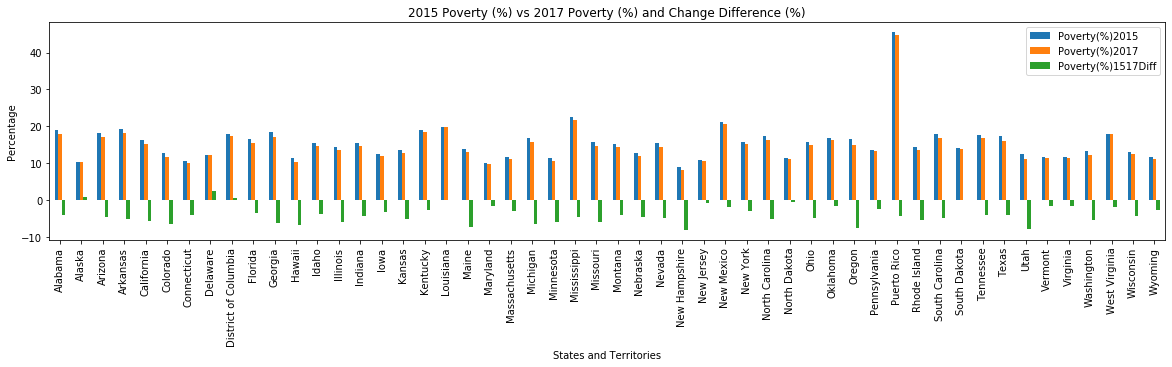

In [33]:
# # Multibar plot of State 2015 Poverty (%) vs 2017 Poverty (%) and Change Difference (%)
# pov_plt_2017 = state_2017_citpov["Poverty(%)"]
# cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
# state_17 = state_2017_citpov["State"]
multi_bar_pov_combo = combo_1517[["State", "Poverty(%)2015", "Poverty(%)2017", "Poverty(%)1517Diff"]].plot(kind="bar", figsize=(20,4))
multi_bar_pov_combo.set_xticklabels(state_plt, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs 2017 Poverty (%) and Change Difference (%)")
plt.show()

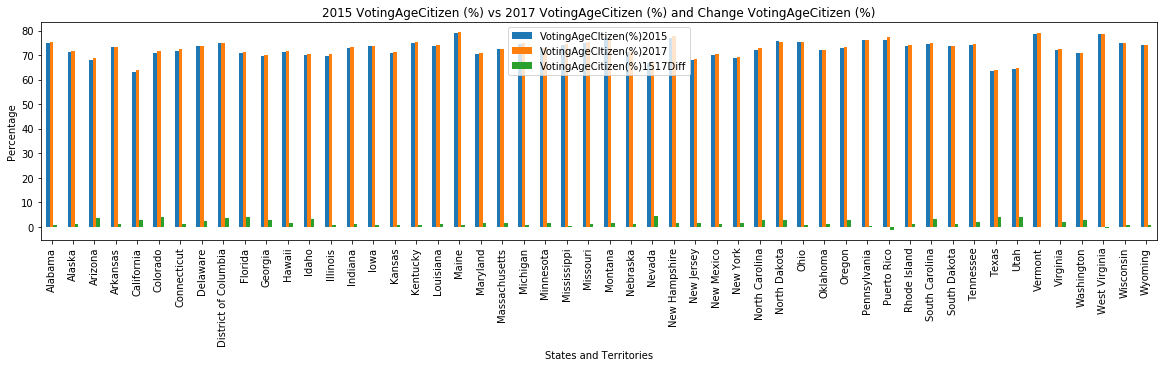

In [34]:
# # Multibar plot of State 2015 Voting Age Citizen (%) vs 2017 Voting Age Citizen (%) and Change Difference (%)
multi_bar_vac_combo = combo_1517[["State", "VotingAgeCItizen(%)2015", "VotingAgeCItizen(%)2017", "VotingAgeCitizen(%)1517Diff"]].plot(kind="bar", figsize=(20,4))
multi_bar_vac_combo.set_xticklabels(state_plt, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 VotingAgeCitizen (%) vs 2017 VotingAgeCitizen (%) and Change VotingAgeCitizen (%)")
plt.show()

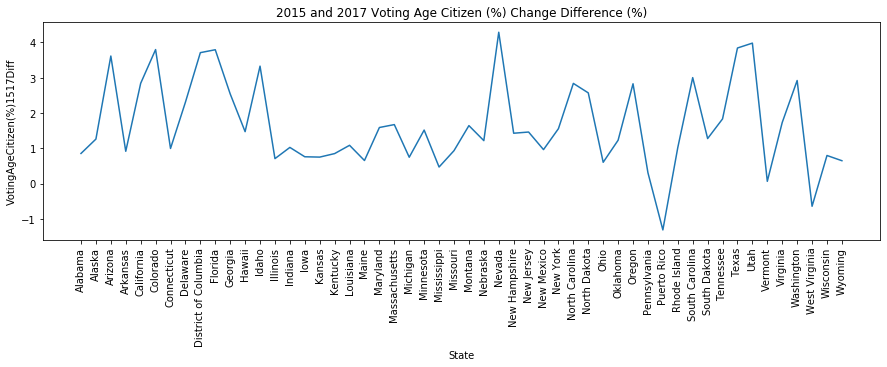

In [35]:
# #Create combo chart
pov_plt_1517diff = combo_1517["Poverty(%)1517Diff"]
vac_plt_1517diff = combo_1517["VotingAgeCitizen(%)1517Diff"]
state_1517 = combo_1517["State"]

# # Line Graph
# plt.figure(figsize=(15, 4))
# plt.plot(state_17, vac_plt_1517diff, marker="o", color="blue", label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2015 and 2017 Voting Age Citizen (%) Change Difference (%)")
# tick_locations = [value for value in state_1517]
# plt.xticks(tick_locations, rotation="vertical")

# create line plot for average percipitation levels
plt.figure(figsize=(15, 4))
plt.title('2015 and 2017 Voting Age Citizen (%) Change Difference (%)')
sns.lineplot(x='State', y='VotingAgeCitizen(%)1517Diff', data=combo_1517, sort=False)
tick_locations = [value for value in state_1517]
plt.xticks(tick_locations, rotation="vertical")
plt.show()

# Difference in 2015 and 2017 for change in Poverty (%) and Adult Population (%)

Hypothesis: Higher the Adult Population  %, the lower the poverty rates %

Poverty dropped in 2017 from 2015 with an increase in adult population in majority of states.  The lowered poverty rate could be due to the 2016 election and new regulations imposed by the new administration.  However, in coming to find this trend, the overall percentage numbers of both Poverty and Adult Population run mostly in tandem with each other.

New Hampshire appeared in the top 5 for both years under lowest overall poverty percentage and highest overall adult population percentage.

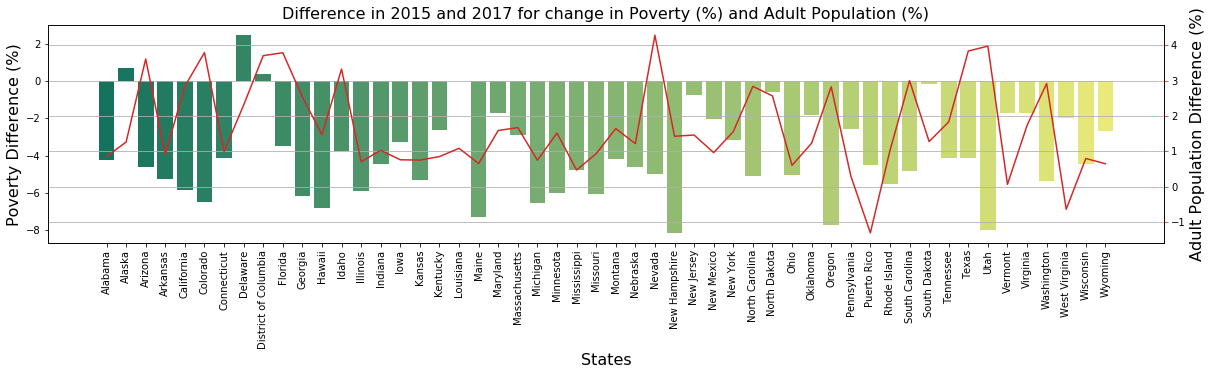

In [36]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,4))
color = 'tab:green'
#bar plot creation
ax1.set_title('Difference in 2015 and 2017 for change in Poverty (%) and Adult Population (%)', fontsize=16)
ax1 = sns.barplot(x='State', y='Poverty(%)1517Diff', data = combo_1517, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='State', y='VotingAgeCitizen(%)1517Diff', data = combo_1517, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax1.set_xlabel('States', fontsize=16)
ax1.set_ylabel('Poverty Difference (%)', fontsize=16)
ax2.set_ylabel('Adult Population Difference (%)', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.grid()
#show plot
plt.show()